# Show graphs for given AEMET stations

In [87]:
# AEMET station ID codes
stations = [
    'C611E',
    'C623I',
]

csv_column_names = [
    "date_time",
    "temp",
    "wind_speed", "wind_dir",
    "wind_gust_speed", "wind_gust_dir",
    "rain",
    "pressure", "pressure_trend",
    "humid"
]

In [88]:
from urllib.request import urlopen
import pandas


base_url = "http://www.aemet.es/es/eltiempo/observacion/ultimosdatos_{station}_datos-horarios.csv?k=coo&l={station}&datos=det&w=0&f=temperatura&x="

data = {}

for station in stations:
    url = base_url.format(station=station)
    df = pandas.read_csv(
        url,
        names=csv_column_names,
        index_col=0,
        parse_dates=True,
        encoding='latin1')
    # Ignore fist lines
    df = df[3:-1]
    # Data conversion
    df['temp'] = df['temp'].astype(float)
    df['wind_speed'] = df['wind_speed'].astype(float)
    df['wind_gust_speed'] = df['wind_gust_speed'].astype(float)
    df['rain'] = df['rain'].astype(float)
    df['humid'] = df['humid'].astype(float)
    data[station] = df

## Temperature and humidity

<AxesSubplot:xlabel='date_time'>

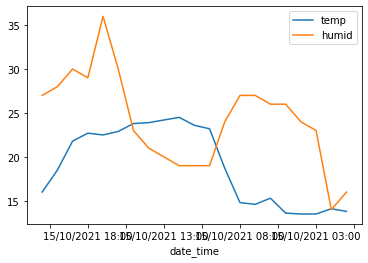

In [89]:
data[stations[0]][['temp', 'humid']].plot()

## Wind speed

<AxesSubplot:xlabel='date_time'>

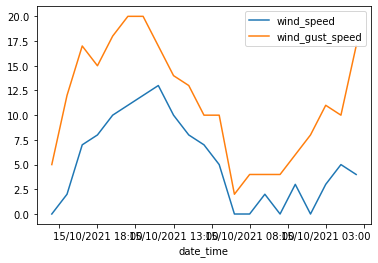

In [90]:
data[stations[0]][['wind_speed', 'wind_gust_speed']].plot()